<a href="https://colab.research.google.com/github/K-R-Reddy/MachineLearning/blob/main/Classification_on_seeds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Models: Seeds Dataset
This notebook builds multiple classification models to predict the Class of the seed (Type)

###Steps:
Load and explore the dataset.<br>
Clean and preprocess the data.<br>
Train the following classification models:<br>
Logistic Regression<br>
Naïve Bayes<br>
KNN<br>
Decision Tree<br>
Support Vector Classifier<br>
Evaluate models using metrics: Accuracy, Precision, Recall, and F1-Score.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,f1_score, confusion_matrix

In [58]:
file_path = '/content/seeds_dataset.csv'
data = pd.read_csv(file_path)
data

,Area,Perimeter,Compactness,Lenght_of_Kernel,Width_of_Kernel,Asymmetry_coefficient,Length_of_kernel_groove,"Class(1,2,3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


##Data Analysis on Seeds Dataset

In [59]:
print("Dataset Shape:", data.shape)

Dataset Shape: (210, 8)


In [60]:
# Display the first 5 rows of the dataset
print(data.head())

    Area  Perimeter  Compactness  ...  Asymmetry_coefficient  Length_of_kernel_groove  Class(1,2,3)
0  15.26      14.84       0.8710  ...                  2.221                    5.220             1
1  14.88      14.57       0.8811  ...                  1.018                    4.956             1
2  14.29      14.09       0.9050  ...                  2.699                    4.825             1
3  13.84      13.94       0.8955  ...                  2.259                    4.805             1
4  16.14      14.99       0.9034  ...                  1.355                    5.175             1

[5 rows x 8 columns]


In [61]:
print(data.sample(10))

      Area  Perimeter  Compactness  ...  Asymmetry_coefficient  Length_of_kernel_groove  Class(1,2,3)
9    16.44      15.25       0.8880  ...                  1.969                    5.533             1
116  18.96      16.20       0.9077  ...                  4.334                    5.750             2
197  13.37      13.78       0.8849  ...                  4.670                    5.091             3
172  11.27      12.97       0.8419  ...                  4.309                    5.000             3
19   12.72      13.57       0.8686  ...                  4.102                    4.914             1
57   14.92      14.43       0.9006  ...                  1.142                    5.088             1
124  15.99      14.89       0.9064  ...                  3.336                    5.144             2
1    14.88      14.57       0.8811  ...                  1.018                    4.956             1
133  16.16      15.33       0.8644  ...                  4.266                    

In [62]:
print(data.tail())

      Area  Perimeter  Compactness  ...  Asymmetry_coefficient  Length_of_kernel_groove  Class(1,2,3)
205  12.19      13.20       0.8783  ...                  3.631                    4.870             3
206  11.23      12.88       0.8511  ...                  4.325                    5.003             3
207  13.20      13.66       0.8883  ...                  8.315                    5.056             3
208  11.84      13.21       0.8521  ...                  3.598                    5.044             3
209  12.30      13.34       0.8684  ...                  5.637                    5.063             3

[5 rows x 8 columns]


In [63]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Lenght_of_Kernel         210 non-null    float64
 4   Width_of_Kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class(1,2,3)             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [64]:
data.describe()

,Area,Perimeter,Compactness,Lenght_of_Kernel,Width_of_Kernel,Asymmetry_coefficient,Length_of_kernel_groove,"Class(1,2,3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


##Data Cleaning and Preprocessing on Seeds Dataset

In [65]:
print("Dataset missing values count:")
data.isnull().sum()

Dataset missing values count:


,0
Area,0
Perimeter,0
Compactness,0
Lenght_of_Kernel,0
Width_of_Kernel,0
Asymmetry_coefficient,0
Length_of_kernel_groove,0
"Class(1,2,3)",0


There is No Missing Values in this Dataset and There is No need to Preprocessing because all are Numeric type columns

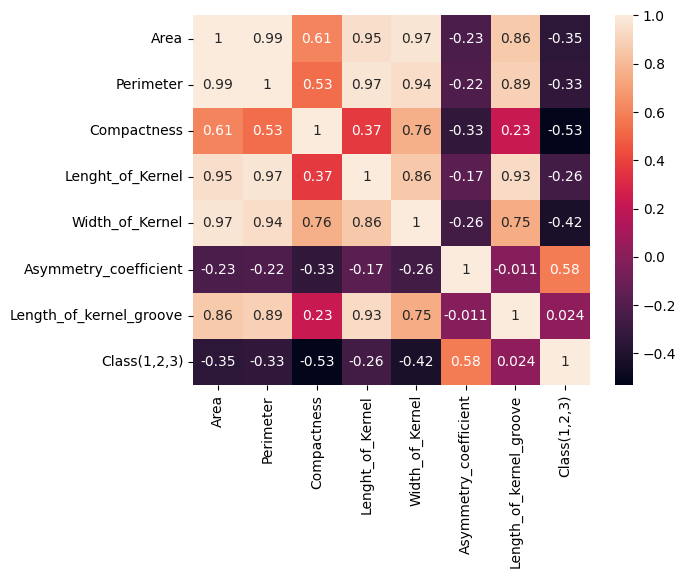

In [66]:
#heatmap on seeds dataset for Knowing Correlation Between Columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True)
plt.show()

##Spliting the Data into Train and Test Sets

In [67]:
X=data.drop("Class(1,2,3)",axis=1)
y=data["Class(1,2,3)"]

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [70]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (168, 7)
Testing Set Shape: (42, 7)


##Initializing Classification Models

In [71]:
lr = LogisticRegression(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42, kernel='linear')

##Training and Evaluating Models


###Logistic Regression model

In [72]:
# Initialize an empty list to store results
results=[]
# Train the model using Linear Regression model
lr.fit(X_train, y_train)
# Make predictions
y_pred_lr = lr.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Linear Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average="weighted"),
    "Recall": recall_score(y_test, y_pred_lr, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred_lr, average="weighted")
})
print("Linear Regression::")
print("Classification report::\n",classification_report(y_test, y_pred_lr))
print("Confusion matrix::\n",confusion_matrix(y_test, y_pred_lr))
print("No. of classes::\n",lr.classes_)
print("Weights::\n",lr.coef_)
print("Probability::\n",lr.predict_proba(X_test))
print("Score::\n",lr.score(X_test, y_test))

Linear Regression::
Classification report::
               precision    recall  f1-score   support

           1       1.00      0.64      0.78        14
           2       0.88      1.00      0.93        14
           3       0.82      1.00      0.90        14

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.87        42
weighted avg       0.90      0.88      0.87        42

Confusion matrix::
 [[ 9  2  3]
 [ 0 14  0]
 [ 0  0 14]]
No. of classes::
 [1 2 3]
Weights::
 [[ 0.17138996  0.32093797 -0.02554709  1.22135411  0.03199665 -0.8585474
  -1.87094551]
 [ 0.98754519  0.97477456  0.42816768  0.157233    0.98349121  0.50833678
   1.40346578]
 [-1.15893514 -1.29571253 -0.40262059 -1.37858711 -1.01548786  0.35021061
   0.46747973]]
Probability::
 [[9.75816822e-01 6.66893543e-03 1.75142422e-02]
 [7.05230296e-02 9.00039790e-04 9.28576931e-01]
 [4.67754773e-01 5.18281915e-01 1.39633125e-02]
 [1.89730741e-03 1.73865131e-05 9.98085306e-01]
 [1.37

###Naive Bayes model

In [73]:
# Train the model using Naive Bayes model
nb.fit(X_train, y_train)
# Make predictions
y_pred_nb = nb.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Naive Bayes model",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb, average="weighted"),
    "Recall": recall_score(y_test, y_pred_nb, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred_nb, average="weighted")
})
print("Naive Bayes model::")
print("Classification report::\n",classification_report(y_test, y_pred_nb))
print("Confusion matrix::\n",confusion_matrix(y_test, y_pred_nb))
print("Probability::\n",nb.predict_proba(X_test))
print("Score::\n",nb.score(X_test, y_test))

Naive Bayes model::
Classification report::
               precision    recall  f1-score   support

           1       0.91      0.71      0.80        14
           2       0.93      0.93      0.93        14
           3       0.82      1.00      0.90        14

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42

Confusion matrix::
 [[10  1  3]
 [ 1 13  0]
 [ 0  0 14]]
Probability::
 [[9.99999768e-001 2.93235506e-012 2.31785434e-007]
 [9.21563907e-005 5.00638271e-018 9.99907844e-001]
 [6.17274390e-001 3.82725610e-001 1.65179706e-021]
 [9.84013179e-009 2.37220202e-025 9.99999990e-001]
 [9.18402896e-011 1.00000000e+000 1.26829004e-051]
 [4.58535372e-001 3.37445972e-009 5.41464625e-001]
 [7.26695068e-029 1.00000000e+000 4.62759737e-108]
 [9.99751411e-001 2.48588751e-004 1.55227754e-015]
 [1.20646873e-019 1.00000000e+000 1.11911584e-080]
 [2.44001270e-011 1.00000000e+000 1.7146585

###KNN Model

In [74]:
# Train the model using KNN model
knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "KNN model",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, average="weighted"),
    "Recall": recall_score(y_test, y_pred_knn, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred_knn, average="weighted")
})
print("KNN model::")
print("Classification report::\n",classification_report(y_test, y_pred_knn))
print("Confusion matrix::\n",confusion_matrix(y_test, y_pred_knn))
print("Probability::\n",knn.predict_proba(X_test))
print("Score::\n",knn.score(X_test, y_test))

KNN model::
Classification report::
               precision    recall  f1-score   support

           1       1.00      0.71      0.83        14
           2       0.88      1.00      0.93        14
           3       0.88      1.00      0.93        14

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42

Confusion matrix::
 [[10  2  2]
 [ 0 14  0]
 [ 0  0 14]]
Probability::
 [[1.  0.  0. ]
 [0.2 0.  0.8]
 [0.4 0.6 0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.6 0.4 0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.6 0.  0.4]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.2 0.8 0. ]
 [0.8 0.  0.2]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.2 0.  0.8]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.2 0.  0.8]
 [0.6 0.  0.4]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]


###Decision Tree model

In [75]:
# Train the model using Decision Tree model
dt.fit(X_train, y_train)
# Make predictions
y_pred_dt = dt.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Decision Tree model",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, average="weighted"),
    "Recall": recall_score(y_test, y_pred_dt, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred_dt, average="weighted")
})
print("Decision Tree model::")
print("Classification report::\n",classification_report(y_test, y_pred_dt))
print("Confusion matrix::\n",confusion_matrix(y_test, y_pred_dt))
print("Probability::\n",dt.predict_proba(X_test))
print("Score::\n",dt.score(X_test, y_test))

Decision Tree model::
Classification report::
               precision    recall  f1-score   support

           1       0.91      0.71      0.80        14
           2       0.87      0.93      0.90        14
           3       0.88      1.00      0.93        14

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

Confusion matrix::
 [[10  2  2]
 [ 1 13  0]
 [ 0  0 14]]
Probability::
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 

###Support Vector Classifier model

In [76]:
# Train the model using Support Vector Classifier model
svc.fit(X_train, y_train)
# Make predictions
y_pred_svc = svc.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Support Vector Classifier model",
    "Accuracy": accuracy_score(y_test, y_pred_svc),
    "Precision": precision_score(y_test, y_pred_svc, average="weighted"),
    "Recall": recall_score(y_test, y_pred_svc, average="weighted"),
    "F1-Score": f1_score(y_test, y_pred_svc, average="weighted")
})
print("Support Vector model::")
print("Classification report::\n",classification_report(y_test, y_pred_svc))
print("Confusion matrix::\n",confusion_matrix(y_test, y_pred_svc))
print("Score::\n",svc.score(X_test, y_test))

Support Vector model::
Classification report::
               precision    recall  f1-score   support

           1       1.00      0.64      0.78        14
           2       0.88      1.00      0.93        14
           3       0.82      1.00      0.90        14

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.87        42
weighted avg       0.90      0.88      0.87        42

Confusion matrix::
 [[ 9  2  3]
 [ 0 14  0]
 [ 0  0 14]]
Score::
 0.8809523809523809


##Summarizing Model Performance

In [77]:
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)



Summary of Model Performance:
                             Model  Accuracy  Precision    Recall  F1-Score
0                Linear Regression  0.880952   0.899510  0.880952  0.873056
1                Naive Bayes model  0.880952   0.887064  0.880952  0.877266
2                        KNN model  0.904762   0.916667  0.904762  0.900000
3              Decision Tree model  0.880952   0.883586  0.880952  0.876628
4  Support Vector Classifier model  0.880952   0.899510  0.880952  0.873056


##Visualizing Model Performance

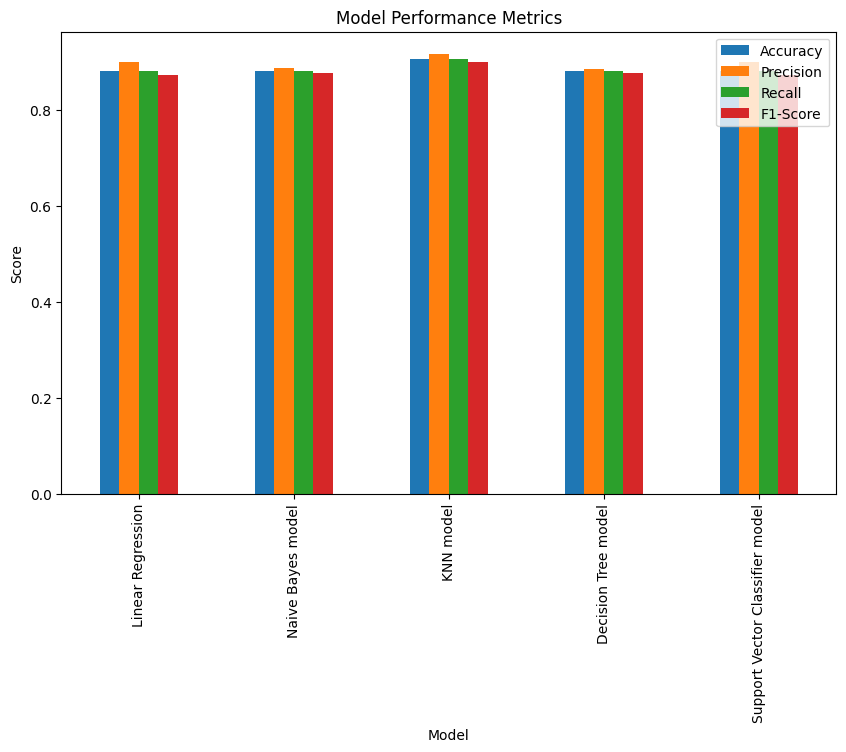

In [78]:
# Plot model performance
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.show()